Starting water expulsion phase...
Water depleted at t=0.123s, starting air expulsion phase...
Air depleted at t=0.199s, starting coasting phase...
Starting water expulsion phase...
Water depleted at t=0.144s, starting air expulsion phase...
Air depleted at t=0.251s, starting coasting phase...
Starting water expulsion phase...
Water depleted at t=0.019s, starting air expulsion phase...
Air depleted at t=0.053s, starting coasting phase...


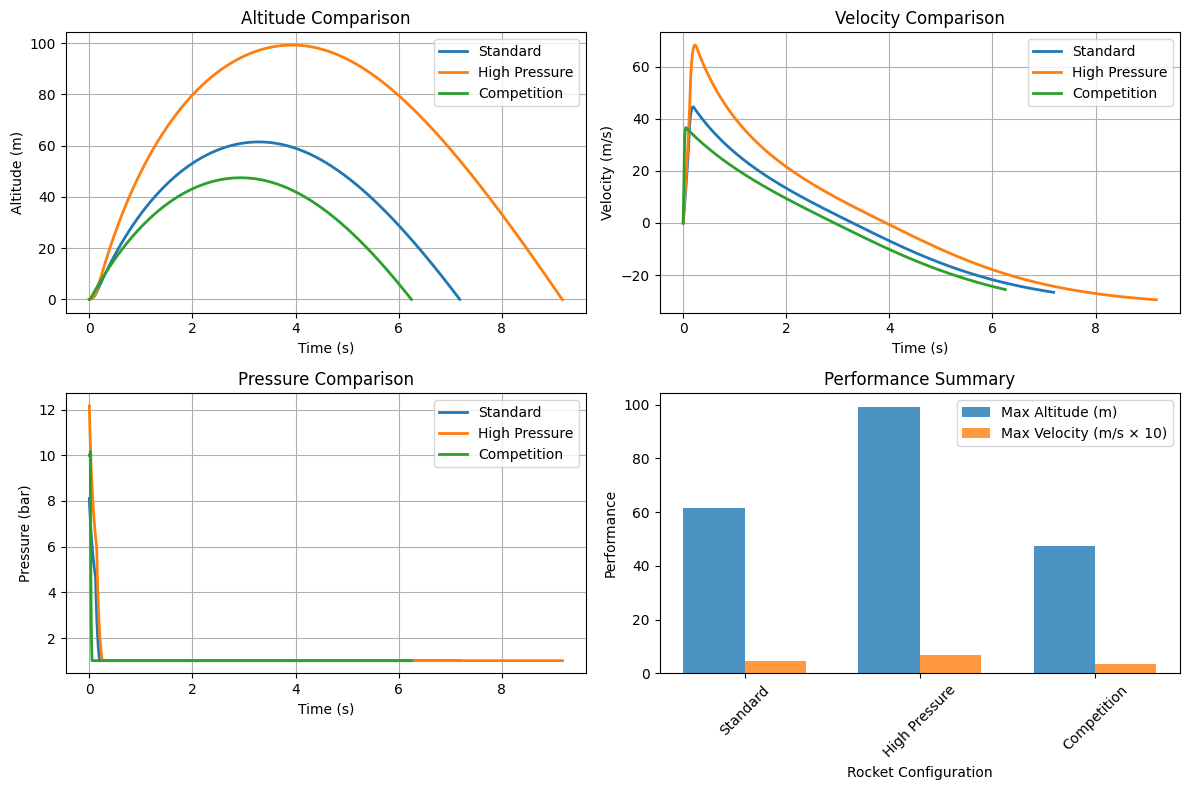

In [2]:
import matplotlib.pyplot as plt
import waterrocketpy.rocket.builder 
from waterrocketpy.core.simulation import WaterRocketSimulator
from waterrocketpy.rocket.builder import create_competition_rocket,create_high_pressure_rocket,create_standard_rocket
from waterrocketpy.core.simulation import WaterRocketSimulator
from waterrocketpy.core.physics_engine import PhysicsEngine
import matplotlib.pyplot as plt
# Simulate multiple rocket configurations
rockets = {
    "Standard": create_standard_rocket(),
    "High Pressure": create_competition_rocket(),
    "Competition": create_high_pressure_rocket()
}

results = {}
for name, rocket in rockets.items():
    # Run simulation
    simulator = WaterRocketSimulator(physics_engine=PhysicsEngine())
    flight_data = simulator.simulate(rocket.to_simulation_params())
    results[name] = flight_data

# Compare altitudes
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for name, data in results.items():
    plt.plot(data.time, data.altitude, label=name, linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.title("Altitude Comparison")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for name, data in results.items():
    plt.plot(data.time, data.velocity, label=name, linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Comparison")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
for name, data in results.items():
    plt.plot(data.time, data.pressure/1e5, label=name, linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Pressure (bar)")
plt.title("Pressure Comparison")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
# Performance summary
names = list(results.keys())
altitudes = [data.max_altitude for data in results.values()]
velocities = [data.max_velocity for data in results.values()]

x = range(len(names))
width = 0.35
plt.bar([i - width/2 for i in x], altitudes, width, label='Max Altitude (m)', alpha=0.8)
plt.bar([i + width/2 for i in x], [v/10 for v in velocities], width, label='Max Velocity (m/s × 10)', alpha=0.8)
plt.xlabel("Rocket Configuration")
plt.ylabel("Performance")
plt.title("Performance Summary")
plt.xticks(x, names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()